In [1]:
#Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exploring Fandango Displayed Scores versus True User Ratings

In [2]:
fandango = pd.read_csv("fandango_scrape.csv")

In [3]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [4]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [5]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


### I'll explore the relationship between popularity of a film and its rating.

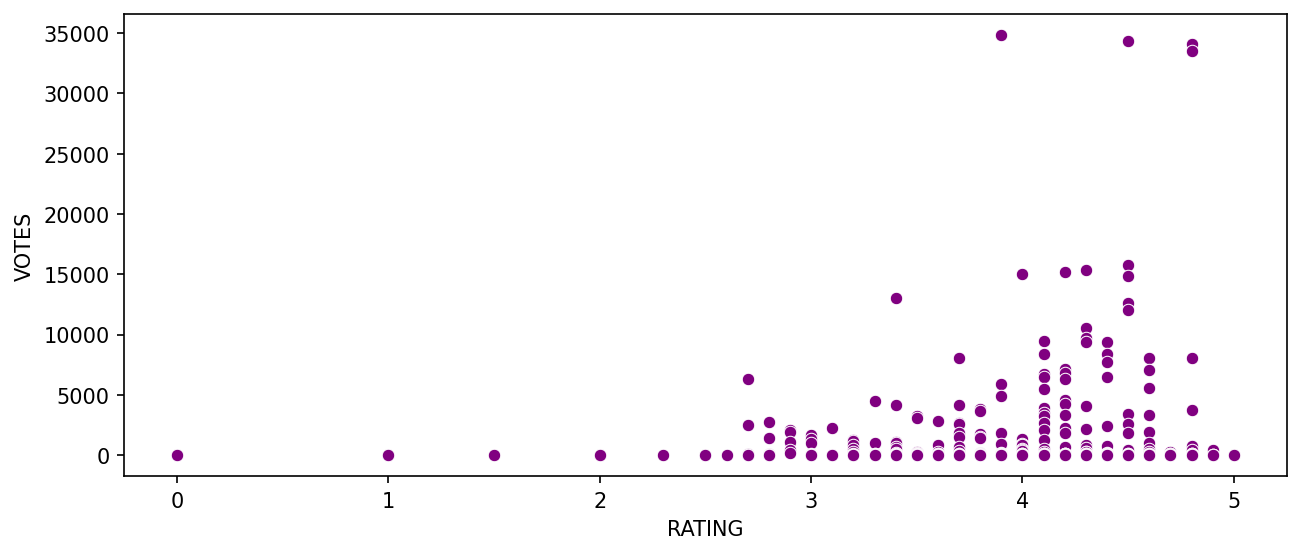

In [6]:
plt.figure(figsize=(10,4),dpi=150)

sns.scatterplot(data=fandango,x='RATING',y='VOTES',color='purple')

plt.show()

In [7]:
fandango.select_dtypes(exclude="object").corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


#### Assuming that every row in the FILM title column has the same format:

     
     
     Film Title Name (Year)



#### I'm gonna create a new column that is able to strip the year from the title strings and set this new column as YEAR

In [8]:
fandango['YEAR'] = fandango['FILM'].apply(lambda st: st.split('(')[-1].replace(')',''))

In [9]:
fandango['YEAR'].value_counts()

YEAR
2015    478
2014     23
2016      1
1964      1
2012      1
Name: count, dtype: int64

#### Visualizing the count of movies per year with a plot:

<Axes: xlabel='YEAR', ylabel='count'>

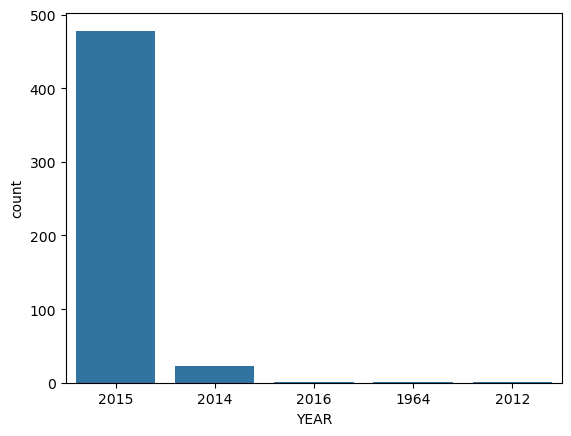

In [10]:
sns.countplot(data=fandango,x='YEAR')

#### What are the 10 movies with the highest number of votes?

In [11]:
fandango.sort_values('VOTES',axis=0,ascending=False).head(10)

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


#### How many movies have zero votes?

In [12]:
len(fandango[fandango['VOTES'] == 0])

69

#### Creating a DataFrame of only reviewed films by removing any films that have zero votes.

In [13]:
Rate = fandango[fandango['VOTES'] > 0].copy()

In [14]:
Rate.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


#### As noted by the look of the data, true user rating may be slightly different than the rating shown to a user. I'll visualize this difference in distributions.

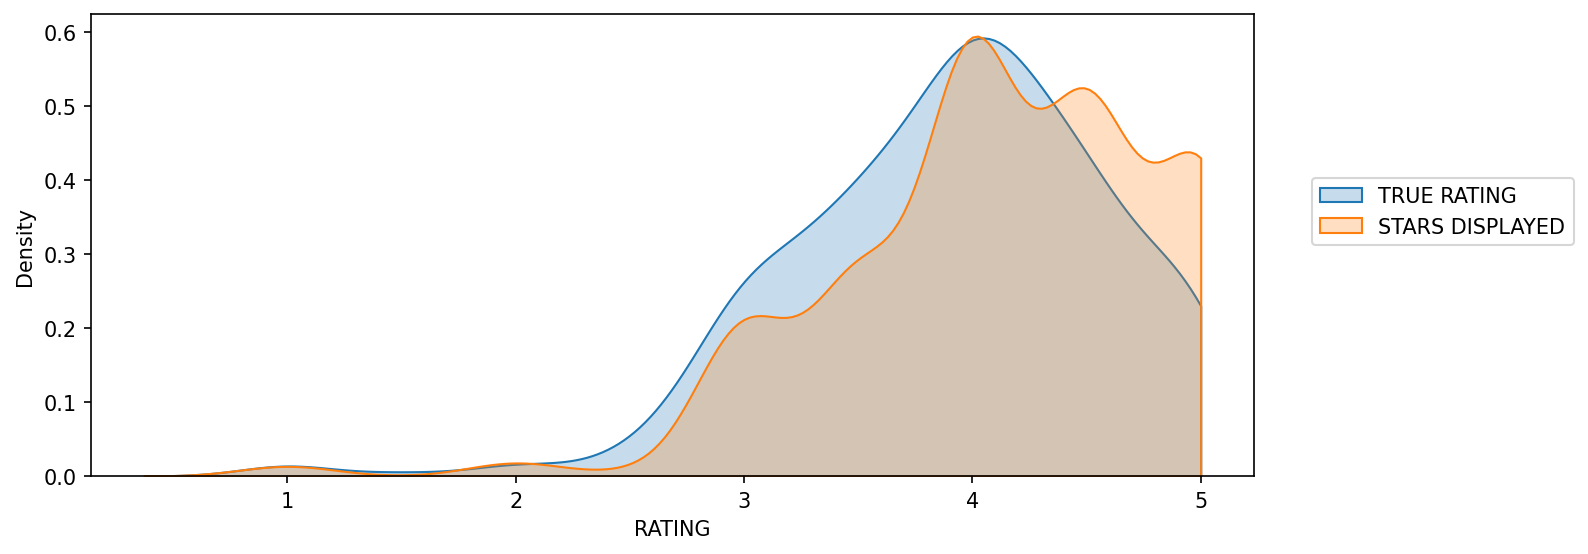

In [15]:
plt.figure(figsize=(10,4),dpi=150)

sns.kdeplot(data=Rate,x='RATING',fill=True,clip=[0,5],label='TRUE RATING')

sns.kdeplot(data=Rate,x='STARS',fill=True,clip=[0,5],label='STARS DISPLAYED')

plt.legend(loc=(1.05,0.5))

plt.show()

### I'll actually quantify this discrepancy.

In [16]:
Rate.loc[:, 'STARS_DIFF'] = Rate['STARS'] - Rate['RATING']
Rate.loc[:, 'STARS_DIFF'] = Rate['STARS_DIFF'].round(2)


In [17]:
Rate.head()

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0


<Axes: xlabel='STARS_DIFF', ylabel='count'>

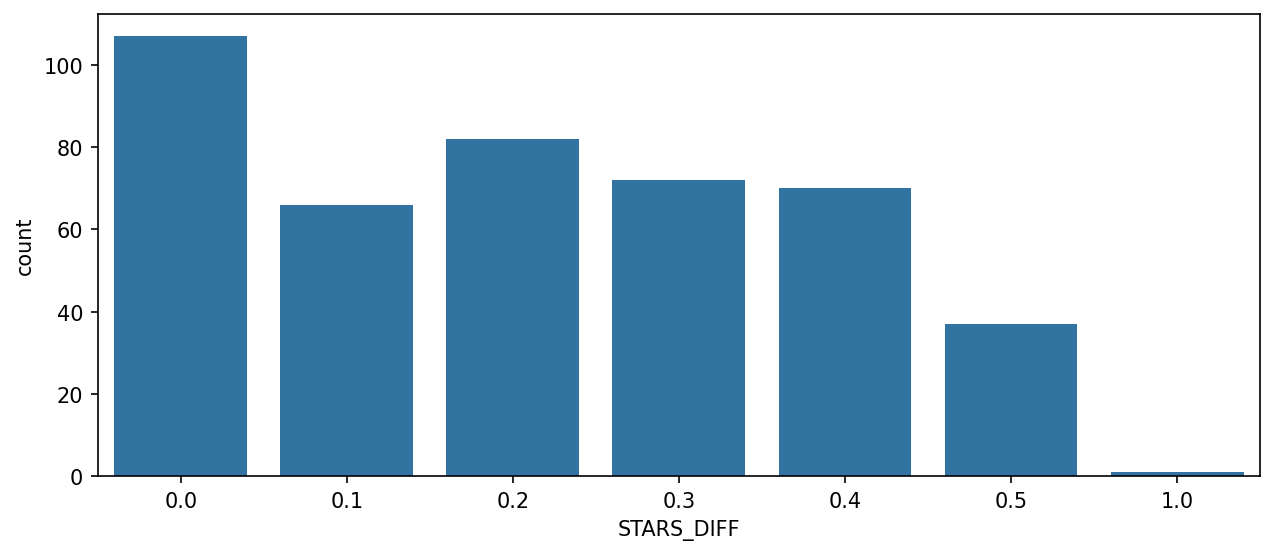

In [18]:
plt.figure(figsize=(10,4),dpi=150)

sns.countplot(data=Rate,x='STARS_DIFF')

#### I can see from the plot that one movie was displaying over a 1 star difference than its true rating! What movie had this close to 1 star differential?

In [19]:
Rate[Rate['STARS_DIFF'] == 1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


### Comparison of Fandango Ratings to Other Sites
 I'll now compare the scores from Fandango to other movies sites and see how they compare.

In [20]:
all_sites = pd.read_csv("all_sites_scores.csv")

In [21]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [22]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.3+ KB


In [23]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


### Rotten Tomatoes
Let me take a look at Rotten Tomatoes. RT has two sets of reviews, their critics reviews (ratings published by official critics) and user reviews.

(0.0, 100.0)

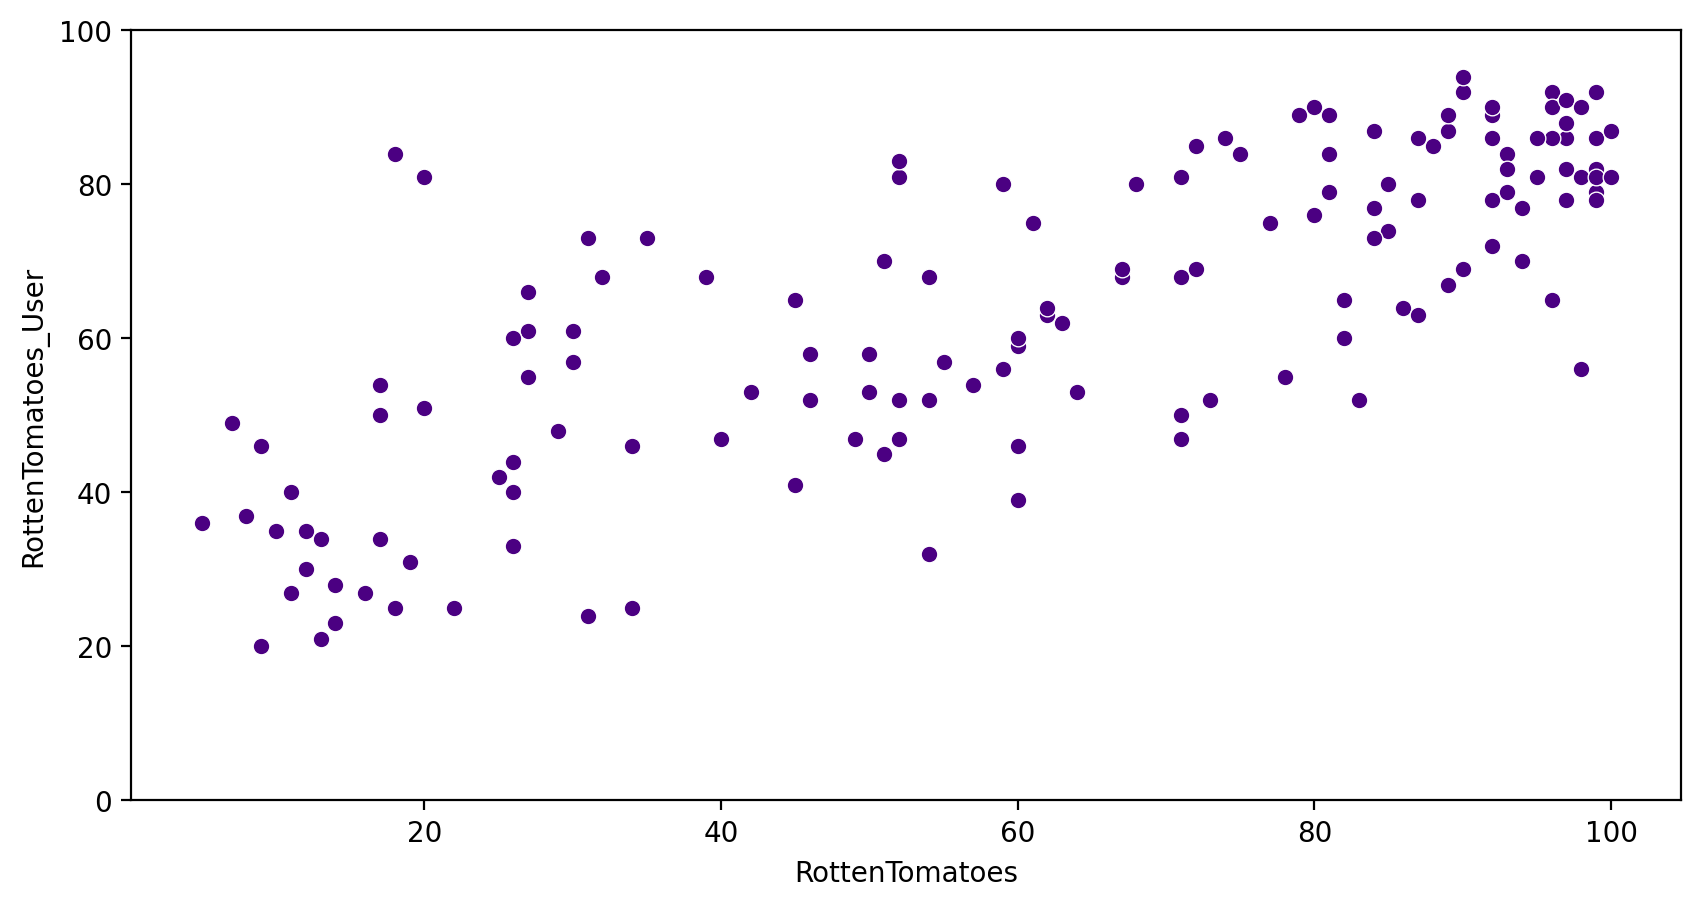

In [24]:
plt.figure(figsize=(10,5),dpi=200)

sns.scatterplot(data=all_sites,x='RottenTomatoes',y='RottenTomatoes_User',color='indigo')
plt.ylim(0,100)

I'll quantify this difference by comparing the critics ratings and the RT User ratings. i will calculate this with RottenTomatoes-RottenTomatoes_User. Note: Rotten_Diff here is Critics - User Score. So values closer to 0 means aggrement between Critics and Users. Larger positive values means critics rated much higher than users. Larger negative values means users rated much higher than critics.

In [25]:
all_sites['Rotten_Diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

In [26]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


Let me now compare the overall mean difference. Since I'm dealing with differences that could be negative or positive, first take the absolute value of all the differences, then take the mean. This would report back on average to absolute difference between the critics rating versus the user rating.

In [27]:
all_sites['Rotten_Diff'].apply(abs).mean()

15.095890410958905

#### I'll plot the distribution of the differences between RT Critics Score and RT User Score. There should be negative values in this distribution plot.

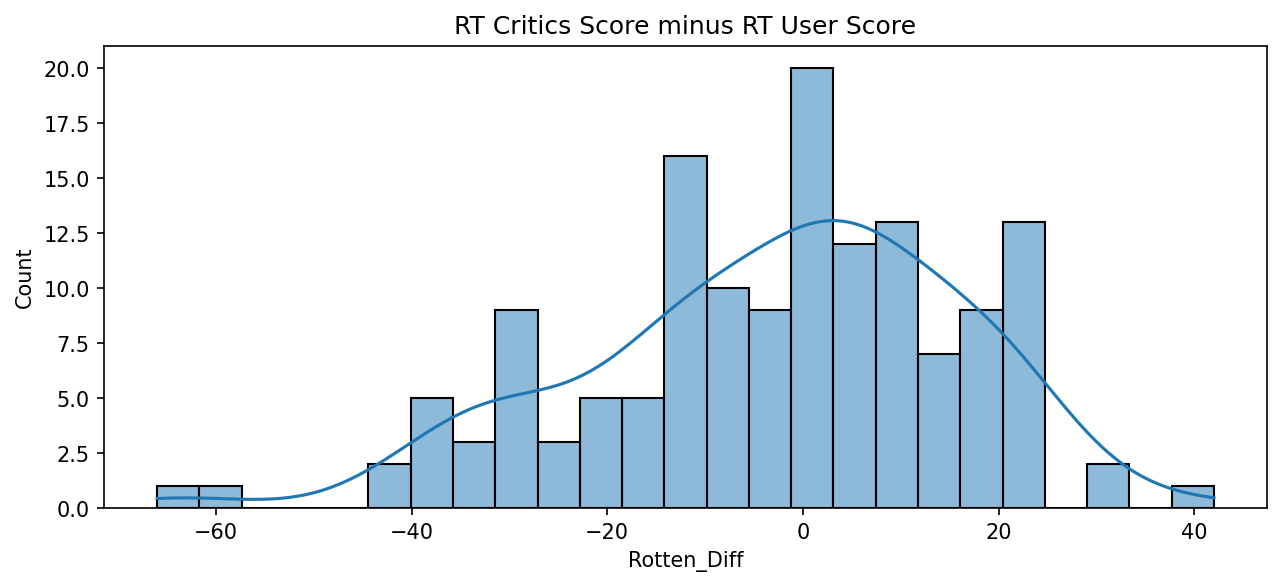

In [28]:
plt.figure(figsize=(10,4),dpi=150)
sns.histplot(data=all_sites,x='Rotten_Diff',bins=25,kde=True)
plt.title('RT Critics Score minus RT User Score');

**Now to create a distribution showing the *absolute value* difference between Critics and Users on Rotten Tomatoes.**

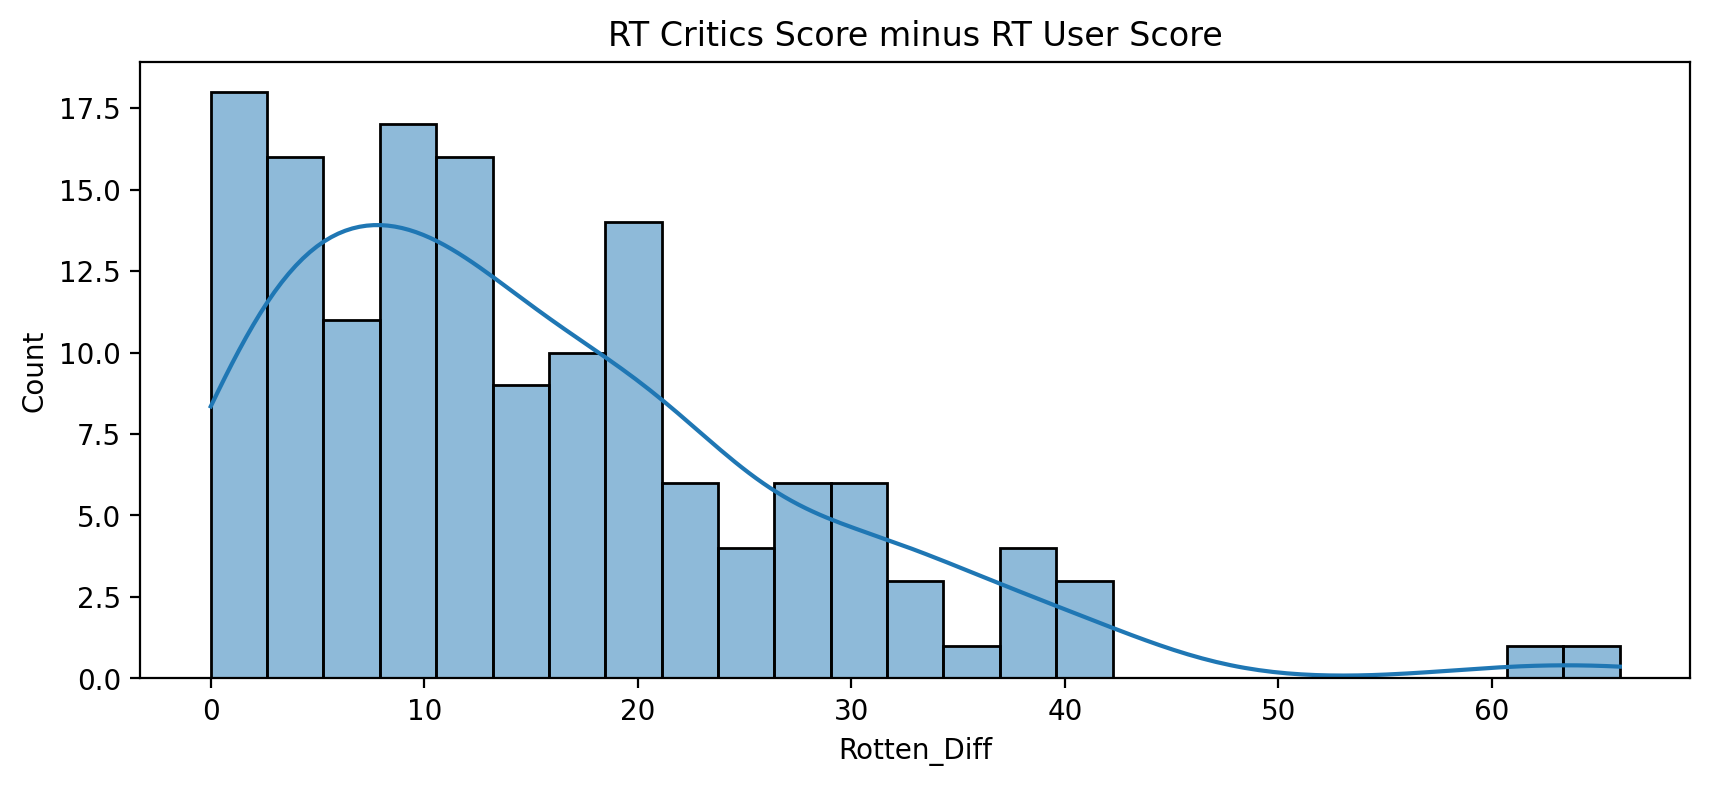

In [29]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(x=all_sites['Rotten_Diff'].apply(abs),bins=25,kde=True)
plt.title('RT Critics Score minus RT User Score');

**Let me find out which movies are causing the largest differences. First, I'll show the top 5 movies with the largest *negative* difference between Users and RT critics. Since I calculated the difference as Critics Rating - Users Rating, then large negative values imply the users rated the movie much higher on average than the critics did.**

**What are the top 5 movies users rated higher than critics on average:**

In [30]:
print('Users Love but Critics Hate')

all_sites.nsmallest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]

Users Love but Critics Hate


,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


**The top 5 movies critics scores higher than users on average.**

In [31]:
print('Critics Love, but Users Hate')

all_sites.nlargest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]

Critics Love, but Users Hate


,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


## MetaCritic

Now let me take a quick look at the ratings from MetaCritic. Metacritic also shows an average user rating versus their official displayed rating.

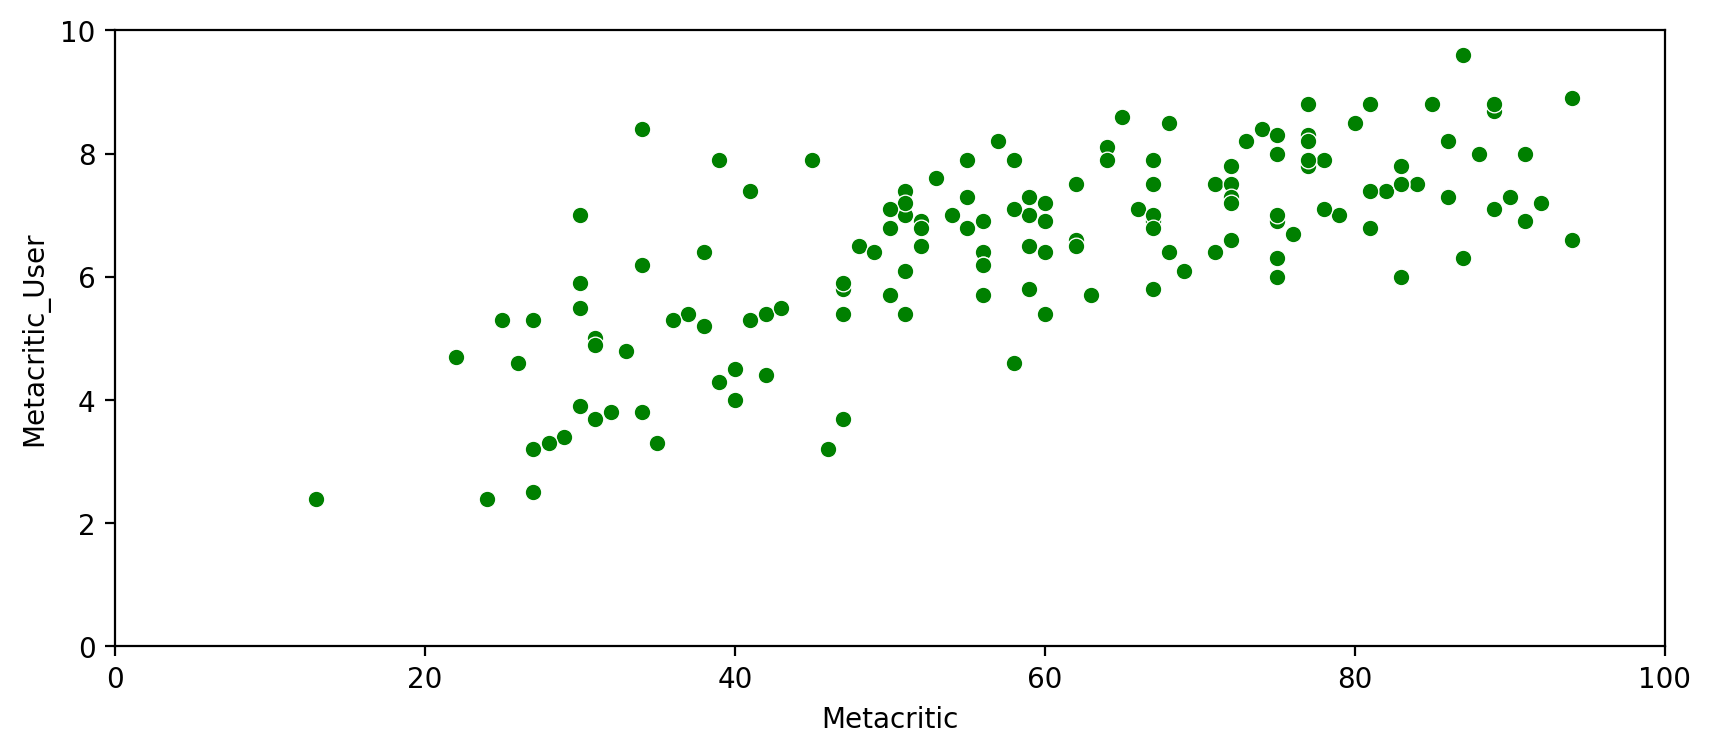

In [32]:
plt.figure(figsize=(10,4),dpi=200)

sns.scatterplot(data=all_sites,x='Metacritic',y='Metacritic_User',color='green')
plt.ylim(0,10)
plt.xlim(0,100);

## IMDB

Finally, I'll explore IMDB. Notice that both Metacritic and IMDB report back vote counts. Let me analyze the most popular movies.

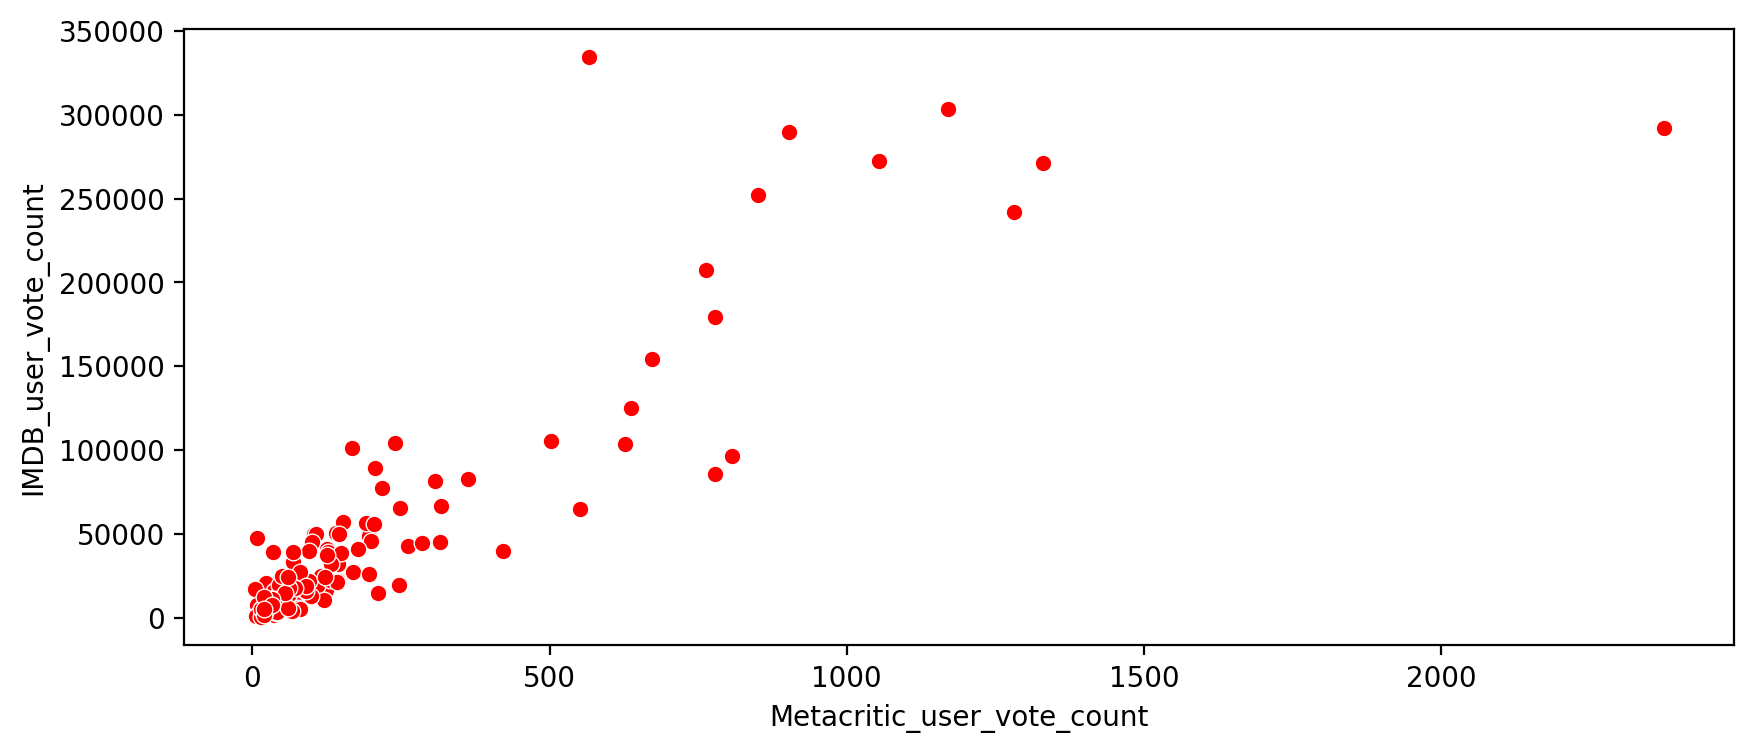

In [33]:
plt.figure(figsize=(10,4),dpi=200)

sns.scatterplot(data=all_sites,x='Metacritic_user_vote_count',y='IMDB_user_vote_count',color='red');

**There are two outliers here. The movie with the highest vote count on IMDB only has about 500 Metacritic ratings. What is this movie?**

In [34]:
all_sites.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


What movie has the highest Metacritic user vote count?**

In [35]:
all_sites.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


## Fandago Scores vs. All Sites

Finally I'll begin to explore whether or not Fandango artificially displays higher ratings than warranted to boost ticket sales.

I'll combine the Fandango Table with the All Sites table. Not every movie in the Fandango table is in the All Sites table, since some Fandango movies have very little or no reviews. I only want to compare movies that are in both DataFrames, so I'll do an *inner* merge to merge together both DataFrames based on the FILM columns.**

In [36]:
Merger = pd.merge(fandango,all_sites,how='inner',on='FILM')

In [37]:
Merger.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Diff                 145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


In [38]:
Merger.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


### Normalize columns to Fandango STARS and RATINGS 0-5 

Notice that RT,Metacritic, and IMDB don't use a score between 0-5 stars like Fandango does. In order to do a fair comparison, I need to *normalize* these values so they all fall between 0-5 stars and the relationship between reviews stays the same.

In [39]:
Merger['RT_Norm'] = round((Merger['RottenTomatoes']/20),1)
Merger['RTU_Norm'] = round((Merger['RottenTomatoes_User']/20),1)
Merger['Meta_Norm'] = round((Merger['Metacritic']/20),1)
Merger['Meta_U_Norm'] = round((Merger['Metacritic_User']/2),1)
Merger['IMDB_Norm'] = round((Merger['IMDB']/2),1)

In [40]:
Merger.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


**I'll now create a norm_scores DataFrame that only contains the normalizes ratings. I want to include both STARS and RATING from the original Fandango table.**

In [41]:
norm_scores = Merger[['FILM','STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm']]

In [42]:
norm_scores.head()

,FILM,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,4.9,4.5,4.7,4.4,4.3


### Comparing Distribution of Scores Across Sites


Does Fandango display abnormally high ratings? As I've shown above, we already know it pushes displayed RATING higher than STARS, but are the ratings themselves higher than average?

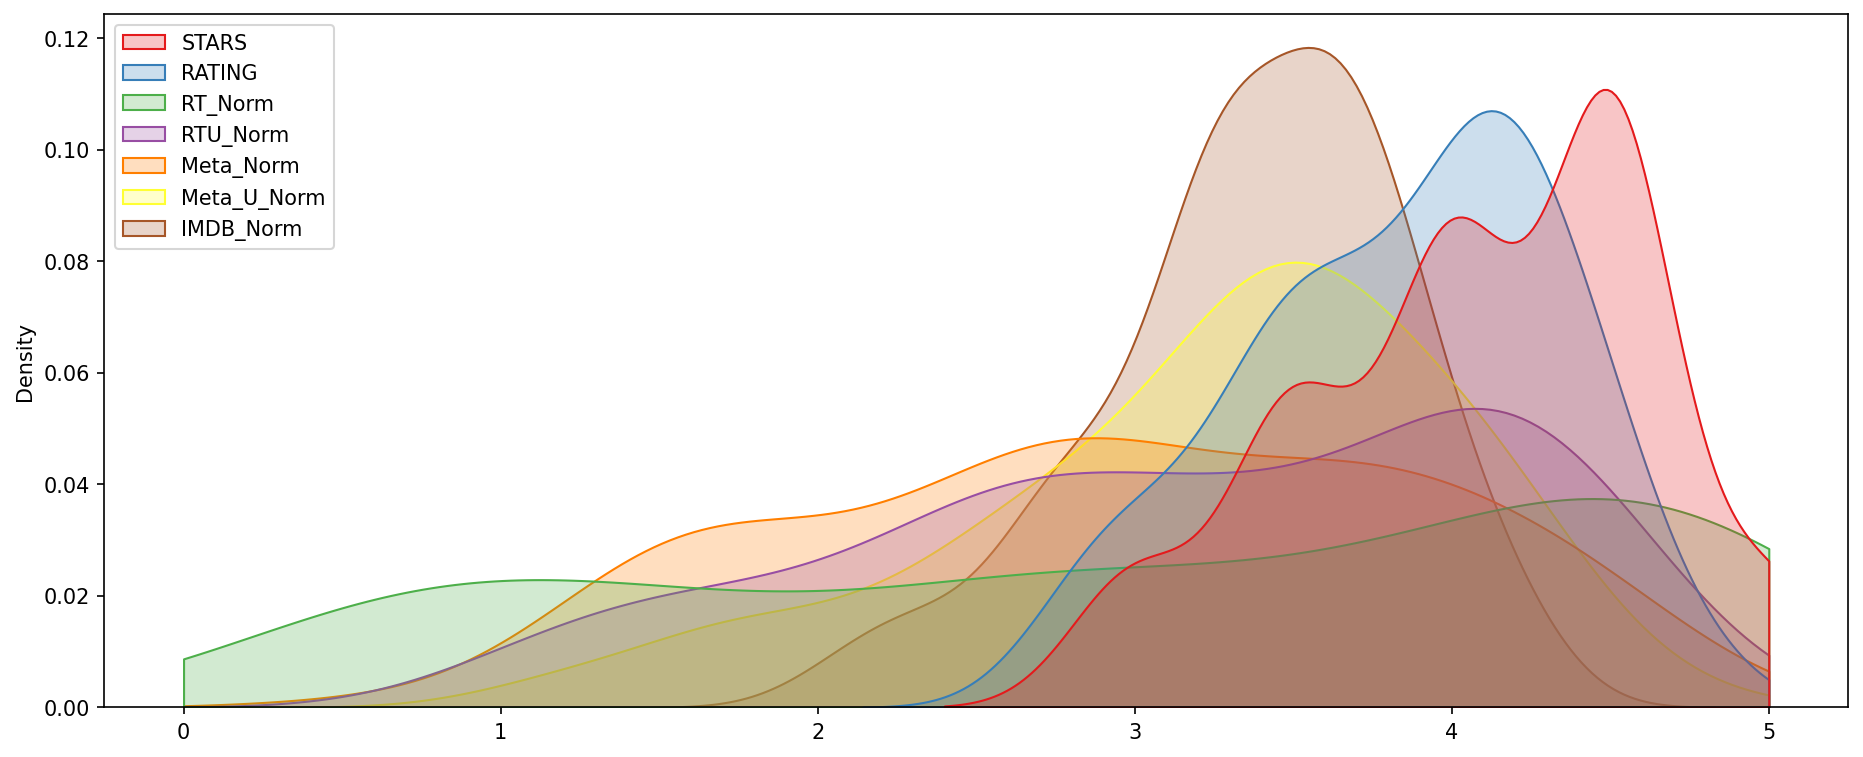

In [43]:
fig,ax= plt.subplots(figsize=(15,6),dpi=150)

sns.kdeplot(data=norm_scores,fill=True,clip=[0,5],palette='Set1')

sns.move_legend(ax, "upper left")

**Clearly Fandango has an uneven distribution. I can also see that RT critics have the most uniform distribution. Let's directly compare these two.** 

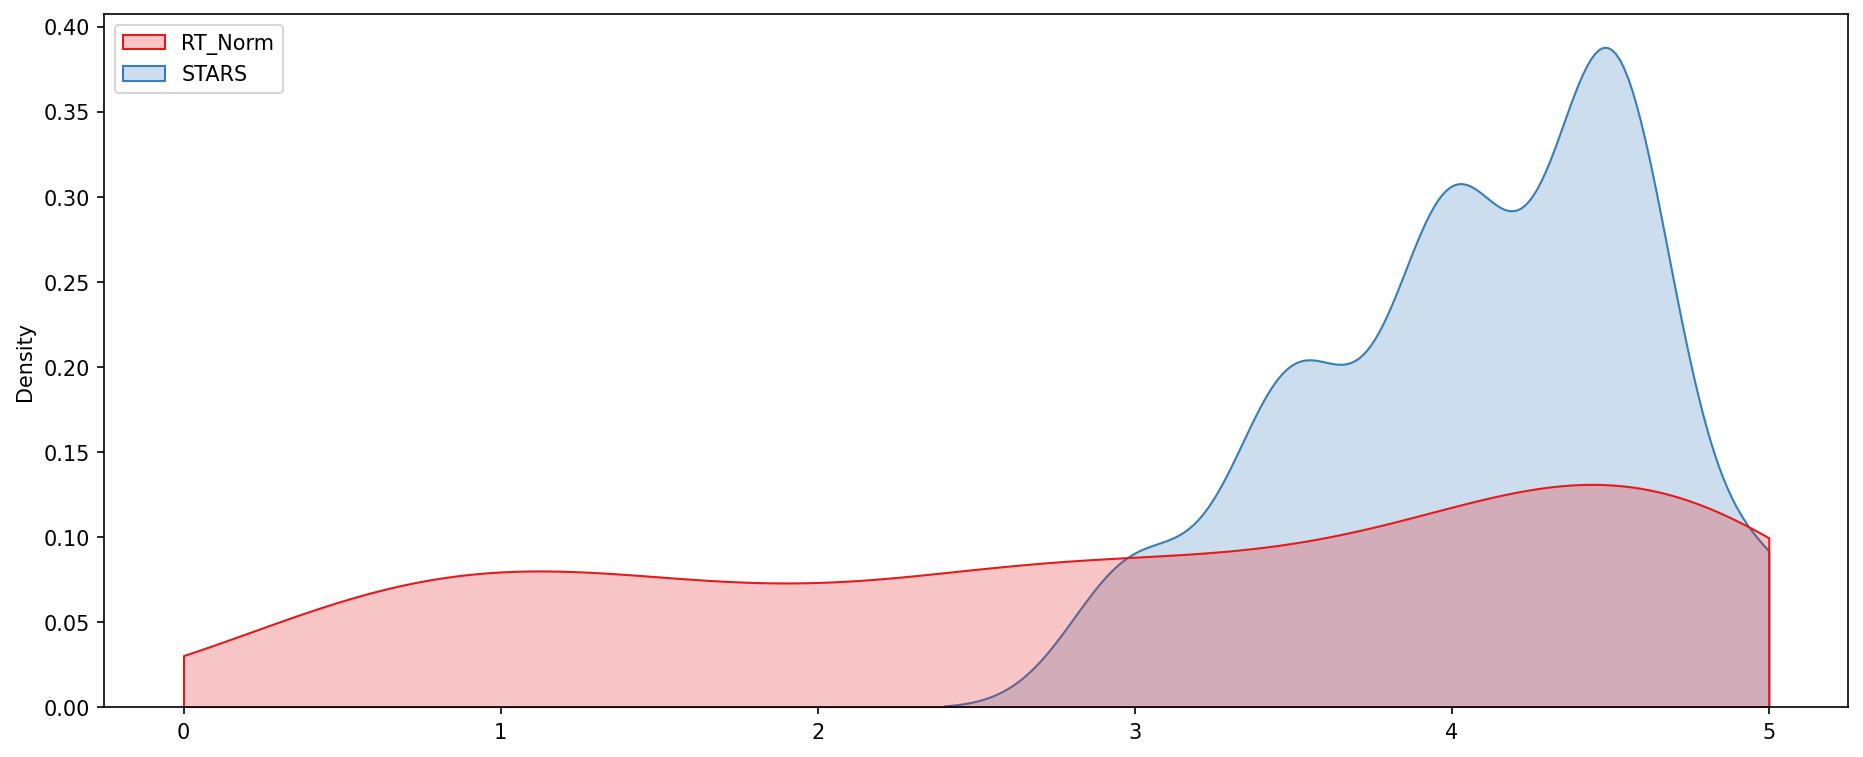

In [44]:
fig,ax = plt.subplots(figsize=(15,6),dpi=150)

sns.kdeplot(data=norm_scores[['RT_Norm','STARS']],fill=True,clip=[0,5],palette='Set1')

sns.move_legend(ax, "upper left")

**Creating a histplot comparing all normalized scores.**

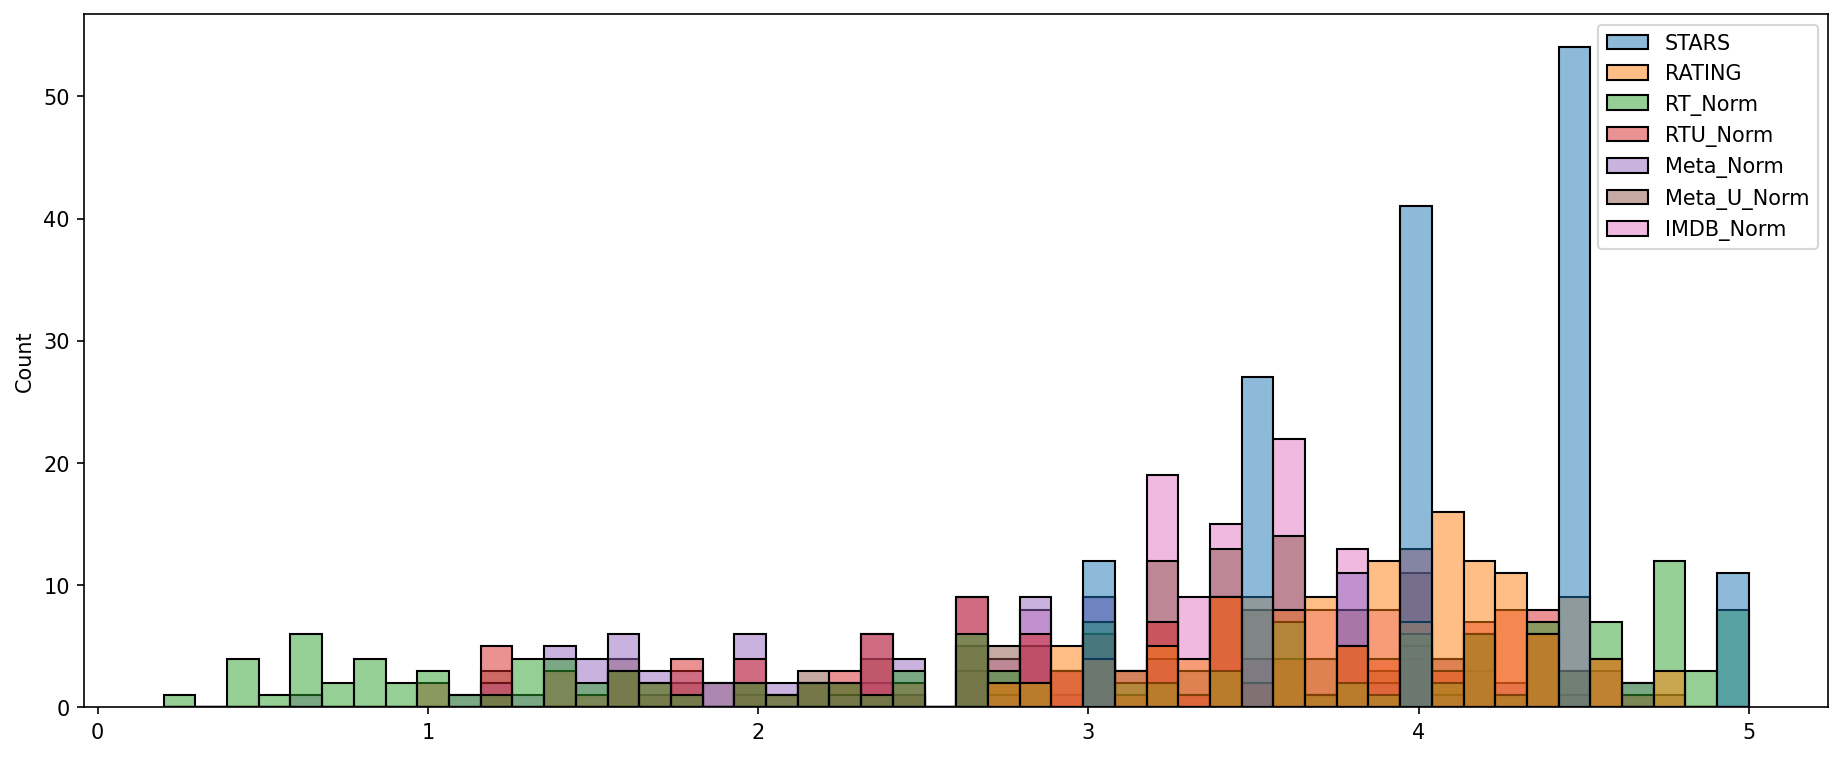

In [45]:
plt.figure(figsize=(15,6),dpi=150)

sns.histplot(data=norm_scores,bins=50)

plt.show()

### How are the worst movies rated across all platforms?

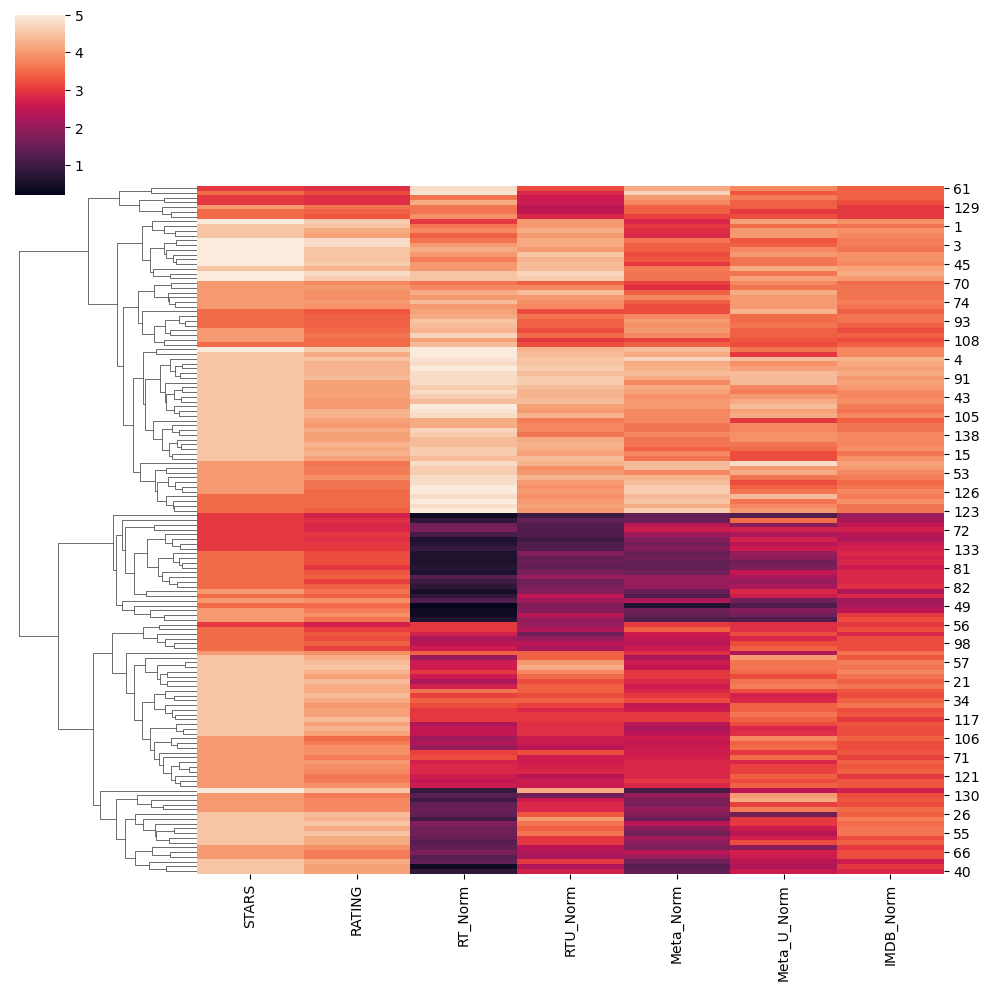

In [46]:
sns.clustermap(data=norm_scores.drop(labels='FILM',axis=1),col_cluster=False)\

plt.show()

**Clearly Fandango is rating movies much higher than other sites, especially considering that it is then displaying a rounded up version of the rating. I'll examine the top 10 worst movies. Based off the Rotten Tomatoes Critic Ratings, what are the top 10 lowest rated movies? What are the normalized scores across all platforms for these movies?**

In [47]:
norm_scores.nsmallest(10,'RT_Norm')

,FILM,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.2,1.8,0.6,1.2,2.2
25,Taken 3 (2015),4.5,4.1,0.4,2.3,1.3,2.3,3.0
28,Fantastic Four (2015),3.0,2.7,0.4,1.0,1.4,1.2,2.0
54,Hot Pursuit (2015),4.0,3.7,0.4,1.8,1.6,1.8,2.4
84,Hitman: Agent 47 (2015),4.0,3.9,0.4,2.4,1.4,1.6,3.0
50,The Boy Next Door (2015),4.0,3.6,0.5,1.8,1.5,2.8,2.3
77,Seventh Son (2015),3.5,3.2,0.6,1.8,1.5,2.0,2.8
78,Mortdecai (2015),3.5,3.2,0.6,1.5,1.4,1.6,2.8
83,Sinister 2 (2015),3.5,3.3,0.6,1.7,1.6,2.5,2.8
87,Unfinished Business (2015),3.5,3.2,0.6,1.4,1.6,1.9,2.7


**I'll visualize the distribution of ratings across all sites for the top 10 worst movies.**

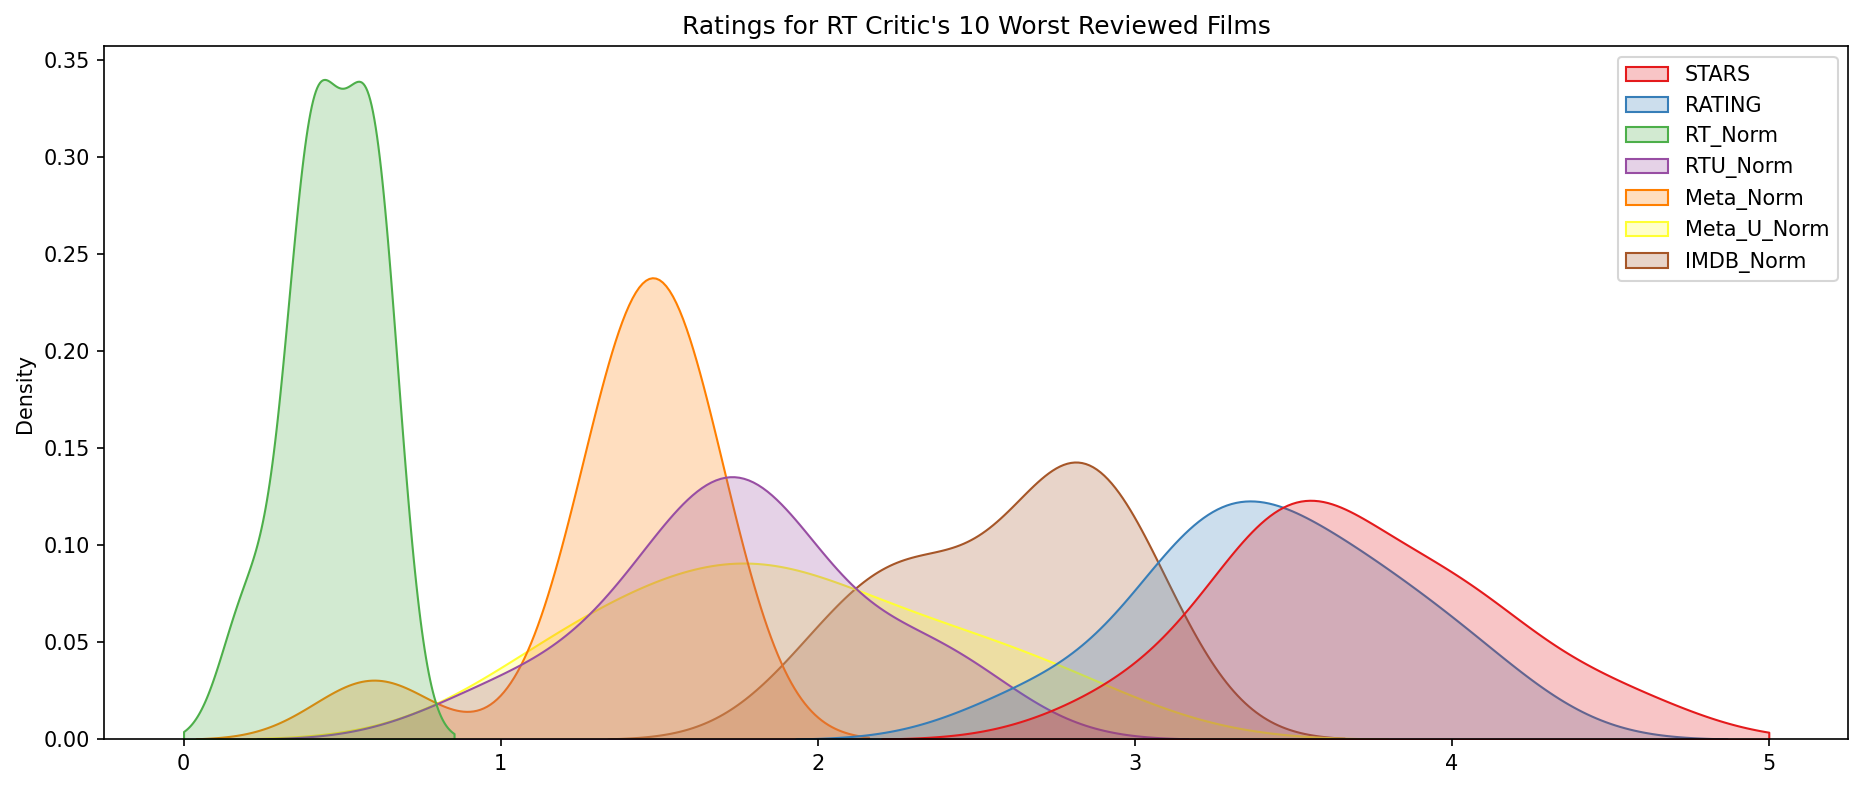

In [48]:
fig,ax = plt.subplots(figsize=(15,6),dpi=150)

sns.kdeplot(data=norm_scores.nsmallest(10,'RT_Norm'),fill=True,clip=[0,5],palette='Set1')

plt.title("Ratings for RT Critic's 10 Worst Reviewed Films" )

plt.show()

In [49]:
Tek = norm_scores.nsmallest(10,'RT_Norm')

In [50]:
Tek[['FILM','STARS']].nlargest(columns='STARS', n=1)

,FILM,STARS
25,Taken 3 (2015),4.5


In [51]:
k = (0.4+2.3+1.3+3.0+2.3)/5

In [52]:
highest_rated_movie_fandango = Tek[Tek['STARS'] == Tek['STARS'].max()]

In [53]:
print(f'The biggest discrepency in ratings on Fandango is for this one movie called {highest_rated_movie_fandango["FILM"].values[0]} with an average rating of {k}.')

The biggest discrepency in ratings on Fandango is for this one movie called Taken 3 (2015) with an average rating of 1.86.
